In [13]:
from PIL import Image

import numpy as np
import scipy
import scipy.misc
import matplotlib.pyplot as plt
from matplotlib import colors
from skimage.restoration import denoise_tv_chambolle

np.random.seed(11)

%config InlineBackend.figure_format = 'svg' 

In [14]:
img = Image.open("pictures\\mri-noise.png").convert('P')
img.load()
img_arr = np.asarray(img, dtype="int32")

img_orig = Image.open("pictures\\mri-noise_orig.png").convert('P')
img_orig.load()
img_orig_arr = np.asarray(img, dtype="int32")

noisy = img_arr + 0.9 * img_arr.std() * np.random.normal(0, 1, img_arr.shape)

In [15]:
tv_denoised_10 = denoise_tv_chambolle(noisy, weight=10)
tv_denoised_25 = denoise_tv_chambolle(noisy, weight=25)

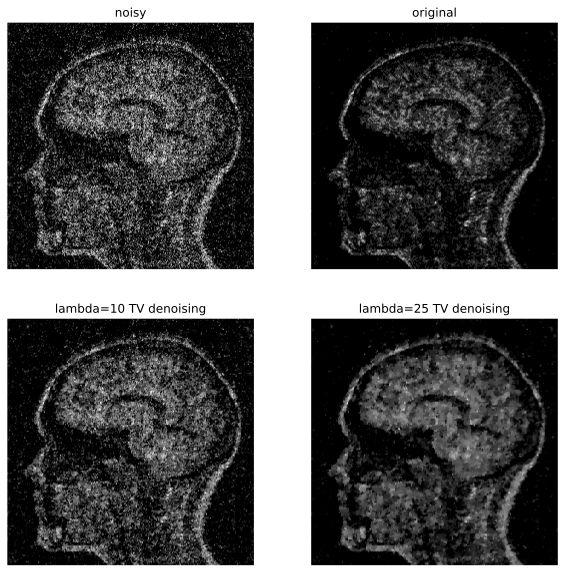

In [16]:
plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.imshow(noisy, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('noisy')

plt.subplot(222)
plt.imshow(img_orig_arr, cmap=plt.cm.gray, vmin=70, vmax=220)
plt.axis('off')
plt.title('original')

plt.subplot(223)
plt.imshow(tv_denoised_10, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('lambda=10 TV denoising')

plt.subplot(224)
plt.imshow(tv_denoised_25, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('lambda=25 TV denoising')

plt.savefig("charts\\tv_lib_brain.pdf")

# Signal 1D

In [17]:
def tv_denoise(y, lmbda=1, n_iters=10):
    J = np.zeros(n_iters)
    z = np.zeros(y.shape[0] - 1)
    alpha = 4
    coef = 1 / alpha
    T = lmbda / 2
    D = np.eye(N=y.shape[0] - 1, M=y.shape[0], k=1)
    np.fill_diagonal(D, -1)
    for i in range(n_iters):        
        x = y - np.dot(D.T, z)
        J[i] = np.sum(np.power(np.abs(x - y), 2)) + lmbda * np.sum(np.abs(np.diff(x)))
        z = z + coef * np.diff(x)
        z = np.maximum(np.minimum(z, T), -T)
    return x, J

In [18]:
n_timesteps = 1000
x1 = np.linspace(0, 3 * np.pi, n_timesteps)
sin_observations = 10 * np.sin(x1) + 5 * np.random.randn(n_timesteps)

denoised_x, target_J = tv_denoise(sin_observations, lmbda=20, n_iters=100)

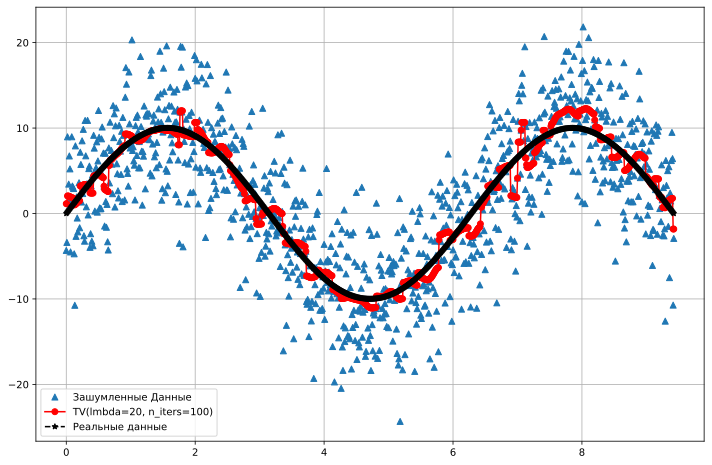

In [19]:
plt.figure(figsize=(12, 8))
plt.plot(x1, sin_observations, marker='^', linestyle = 'None', label="Зашумленные Данные")
plt.plot(x1, denoised_x, linestyle='-', marker='o', color='r', label="TV(lmbda=20, n_iters=100)")
plt.plot(x1, 10 * np.sin(x1), linestyle='--', marker='*', color='black', label="Реальные данные")
plt.grid()
plt.legend()

plt.savefig("charts\\tv_smoother.pdf")

In [20]:
def gen_signal(size_):
    result = []
    for i in range(size_):
        temp = np.random.choice([0, 1, 2, 3, 4, 5, 6])
        for _ in range(np.random.choice([2, 3, 4, 5])):
            if len(result) == size_:
                return np.array(result)
            result.append(temp)
    return np.array(result)

In [21]:
sample_size = 100
x3 = np.arange(sample_size)
signal2 = gen_signal(100)

noised_signal2 = signal2 + np.random.normal(0, 1, signal2.shape[0])

denoised_x3, target_J3 = tv_denoise(noised_signal2, lmbda=3, n_iters=20)

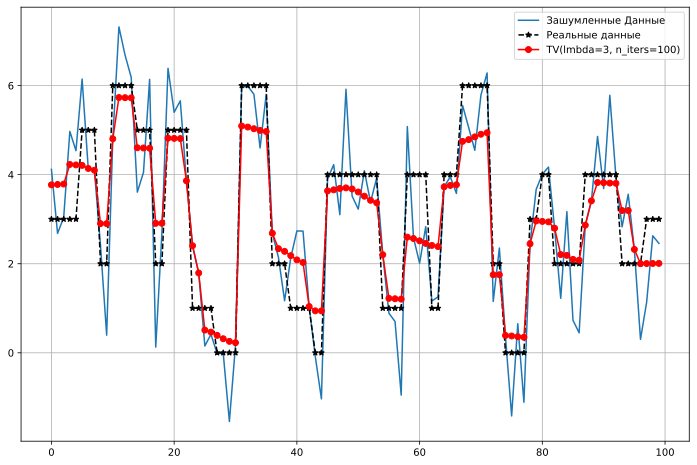

In [22]:
plt.figure(figsize=(12, 8))
plt.plot(x3, noised_signal2, linestyle = '-', label="Зашумленные Данные")
plt.plot(x3, signal2, linestyle='--', marker='*', color='black', label="Реальные данные")
plt.plot(x3, denoised_x3, linestyle='-', marker='o', color='r', label="TV(lmbda=3, n_iters=100)")
plt.grid()
plt.legend()
plt.savefig("charts\\tv_signal_1d.pdf")